# Chapter 3 - Smoothing Methods

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

## Simple Exponential Smoothing in Action

In [3]:
url1 = ('https://raw.githubusercontent.com/Apress/hands-on-time-series-analylsis-python/refs/heads/master/Data/FB.csv')

df = pd.read_csv(url1)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600
5,2014-12-15,78.459999,78.580002,76.559998,76.989998,76.989998,29396500
6,2014-12-16,76.190002,77.389999,74.589996,74.690002,74.690002,31554600
7,2014-12-17,75.010002,76.410004,74.900002,76.110001,76.110001,29203900
8,2014-12-18,76.889999,78.400002,76.510002,78.400002,78.400002,34222100
9,2014-12-19,78.750000,80.000000,78.330002,79.879997,79.879997,43335000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [5]:
 # Select the 'Close' column from the DataFrame and store it in X
X = df['Close']             

test = X.iloc[-30:]     # Assign the last 30 values of X to the test set
train = X.iloc[:-30]    # Assign all values except the last 30 to the train set

In [6]:
type(X)

pandas.core.series.Series

In [7]:
type(test)

pandas.core.series.Series

### The SimpleExpSmoothing parameter specifies the following:

**smoothing_level (float, optional):** 

    This is the smoothing_level value of the simple exponential smoothing. If the value is set, then this value will be used as the value.

**optimized (bool):** 

    This specifies whether the values that have not been set earlier should be optimized automatically.

In [8]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred):
        
        y_true, y_pred = np.array(y_true), np.array(y_pred)

        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        
        return mape
        
    print('Evaluation metric results:-')
    print(f' MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f' MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'  R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [9]:
resu = []                       # Initialize result list
temp_df = pd.DataFrame()        # Create an empty DataFrame to store RMSE results

smoothing_level = [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]

for i in smoothing_level:
    
    print(f'Fitting for smoothing level= {i}')                              # Display current smoothing level
    
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=i, optimized=False)    # Fit model with given smoothing level
    
    fcst_pred_v = fit_v.forecast(30)                                        # Forecast next 30 periods
    
    timeseries_evaluation_metrics_func(test, fcst_pred_v)                   # Evaluate performance
    
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))           # Calculate RMSE
    
    df3 = {'smoothing parameter': i, 'RMSE': rmse}                          # Store smoothing level and RMSE
    
    temp_df = pd.concat([temp_df, pd.DataFrame([df3])], ignore_index=True)  # Append to result DataFrame

temp_df.sort_values(by='RMSE').head(3)                                      # Show top 3 smoothing levels with lowest RMSE

Fitting for smoothing level= 0
Evaluation metric results:-
 MSE is : 14123.11196903136
 MAE is : 118.76366943333332
RMSE is : 118.84069996861918
MAPE is : 60.79708542749399
  R2 is : -770.6370351163115

Fitting for smoothing level= 0.1
Evaluation metric results:-
 MSE is : 130.19890782430633
 MAE is : 10.578096050945016
RMSE is : 11.41047360210374
MAPE is : 5.371184257014935
  R2 is : -6.113609198116427

Fitting for smoothing level= 0.2
Evaluation metric results:-
 MSE is : 108.84519758407878
 MAE is : 9.515377334756147
RMSE is : 10.432890183648958
MAPE is : 4.826729569629682
  R2 is : -4.946917770998036

Fitting for smoothing level= 0.3
Evaluation metric results:-
 MSE is : 101.81858360183577
 MAE is : 9.13869749146715
RMSE is : 10.090519491177636
MAPE is : 4.633748018445831
  R2 is : -4.563008361226736

Fitting for smoothing level= 0.4
Evaluation metric results:-
 MSE is : 101.76016636355348
 MAE is : 9.135500785521595
RMSE is : 10.087624416261416
MAPE is : 4.632110274130487
  R2 is 

,smoothing parameter,RMSE
10,1.0,9.878157
9,0.9,9.926882
8,0.8,10.008074


In [10]:
# Using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
 MSE is : 130.19890782430633
 MAE is : 10.578096050945016
RMSE is : 11.41047360210374
MAPE is : 5.371184257014935
  R2 is : -6.113609198116427



In [11]:
# Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
 MSE is : 97.68044511489337
 MAE is : 8.90941374915351
RMSE is : 9.88334179895107
MAPE is : 4.51628080314019
  R2 is : -4.336915066776707



In [12]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,SimpleExpSmoothing,SSE,8965.774
Optimized:,True,AIC,2446.285
Trend:,None,BIC,2456.513
Seasonal:,None,AICC,2446.318
Seasonal Periods:,None,Date:,"Wed, 09 Apr 2025"
Box-Cox:,False,Time:,15:27:32
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9808446,alpha,True
initial_level,76.519997,l.0,False


In [13]:
# Create a DataFrame from forecast values with column name 'Close_grid_Search'
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])   

# Add a new column 'new_index' with values from 1229 to 1258
df_fcst_gs_pred["new_index"] = range(1229, 1259)     

# Set 'new_index' as the DataFrame index
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")                      


df_fcst_gs_pred.head()

,Close_grid_Search
new_index,
1229,184.70557
1230,184.70557
1231,184.70557
1232,184.70557
1233,184.70557


In [14]:
# Create a DataFrame from automatic forecast values with column name 'Close_auto_search'
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])  

# Add a new column 'new_index' with values from 1229 to 1258
df_fcst_auto_pred["new_index"] = range(1229, 1259)    

# Set 'new_index' as the DataFrame index
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")                     


df_fcst_auto_pred.head()

,Close_auto_search
new_index,
1229,186.374253
1230,186.374253
1231,186.374253
1232,186.374253
1233,186.374253


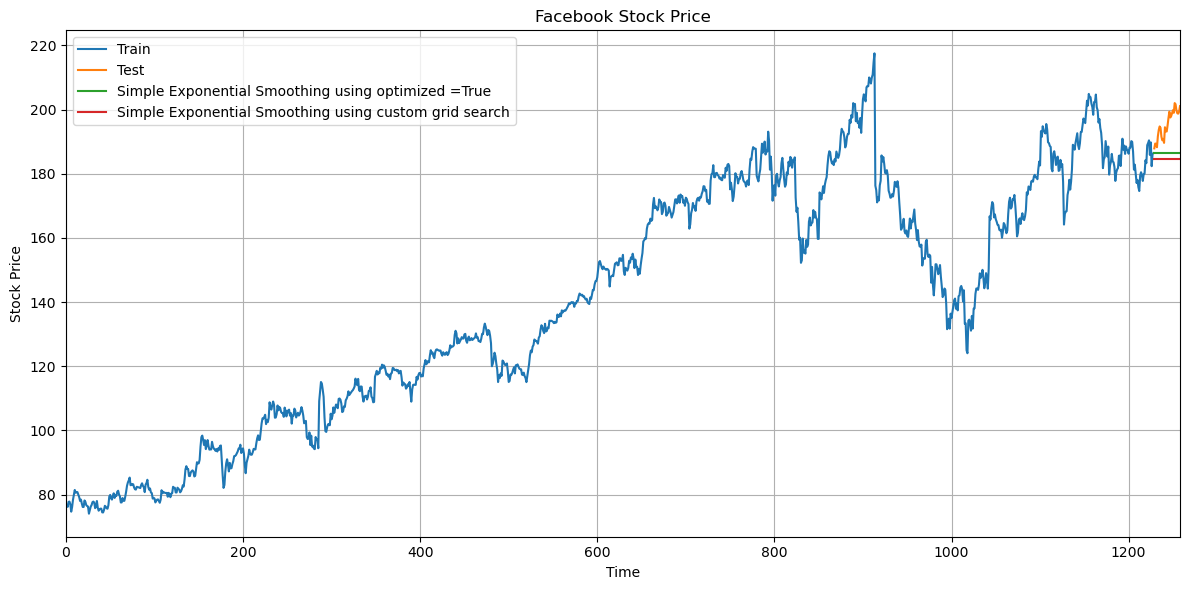

In [15]:
# Plot actual and fitted serie
plt.figure(figsize=(12, 6))                                      

plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')

plt.title('Facebook Stock Price')                      
plt.xlabel('Time')                                        
plt.ylabel('Stock Price')
plt.xlim(0,1258)
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show();

We can clearly see that the simple exponential smoothing is not
performing well as the stock market data, which will have trends and
seasonality. Our basic model will not be able to capture these details.

# Double Exponential Smoothing (Holt’s)

In [17]:
train = df.Close[0:-30]
test = df.Close[-30:]

In [18]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred):
        
        y_true, y_pred = np.array(y_true), np.array(y_pred)

        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        
        return mape
        
    print('Evaluation metric results:-')
    print(f' MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f' MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'  R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [19]:
from sklearn.model_selection import ParameterGrid


param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 
              'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damped' : [True, False]}

pg = list(ParameterGrid(param_grid))

In [36]:
from statsmodels.tsa.holtwinters import Holt
from sklearn import metrics
import numpy as np
import pandas as pd
from timeit import default_timer as timer

# Define parameter grid for search
pg = [{'smoothing_level': sl, 'smoothing_trend': None, 'damping_trend': None, 'damped_trend': None}
      for sl in np.round(np.arange(0.1, 1.0, 0.1), 2)]  # Clean grid, no duplicates

# Initialize empty DataFrame with correct dtypes
df_results_moni = pd.DataFrame({
    'smoothing_level': pd.Series(dtype='float'),
    'smoothing_trend': pd.Series(dtype='float'),
    'damping_trend': pd.Series(dtype='float'),
    'damped_trend': pd.Series(dtype='bool'),
    'RMSE': pd.Series(dtype='float'),
    'r2': pd.Series(dtype='float')
})


start = timer()

for a, b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_trend = b.get('smoothing_trend')
    damping_trend = b.get('damping_trend')
    damped_trend = b.get('damped_trend')

    print(smoothing_level, smoothing_trend, damping_trend, damped_trend)

    # Fit the model using optimized=True when any parameter is None
    if None in [smoothing_level, smoothing_trend, damping_trend]:
        fit1 = Holt(train, damped_trend=damped_trend).fit(optimized=True)
    else:
        fit1 = Holt(train, damped_trend=damped_trend).fit(
            smoothing_level=smoothing_level,
            smoothing_trend=smoothing_trend,
            damping_trend=damping_trend,
            optimized=False
        )

    # Forecast and evaluate
    z = fit1.forecast(30)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])

    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)

    # Create the new row as a DataFrame
    new_row = pd.DataFrame([{
        'smoothing_level': smoothing_level,
        'smoothing_trend': smoothing_trend,
        'damping_trend': damping_trend,
        'damped_trend': damped_trend,
        'RMSE': RMSE,
        'r2': r2
    }])

    # Concatenate with the main results DataFrame
    df_results_moni = pd.concat([df_results_moni, new_row], ignore_index=True)

end = timer()

print(f'Total time taken to complete grid search in seconds: {(end - start):.2f}')

0.1 None None None
0.2 None None None
0.3 None None None
0.4 None None None
0.5 None None None
0.6 None None None
0.7 None None None
0.8 None None None
0.9 None None None
Total time taken to complete grid search in seconds: 0.21


In [38]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_trend,damping_trend,damped_trend,RMSE,r2
0,0.1,None,None,None,8.162461,-2.640197


In [42]:
# Fit the Holt’s Linear Trend model
fit1 = Holt(train,damped_trend =False ).fit(smoothing_level=0.9,    # Weight for the level component
                                            smoothing_trend=0.6,    # Weight for the trend component
                                            damping_trend = 0.1 ,   # Damping factor applied to the trend
                                            optimized=False)        # Do not optimize automatically, use the given values

# Forecast the next 30 time periods using the fitted model
Forecast_custom_pred = fit1.forecast(30)

# Display a summary of the fitted model parameters and statistics
fit1.summary()

Dep. Variable:,Close,No. Observations:,1229
Model:,Holt,SSE,12220.966
Optimized:,False,AIC,2830.954
Trend:,Additive,BIC,2851.410
Seasonal:,None,AICC,2831.023
Seasonal Periods:,None,Date:,"Wed, 09 Apr 2025"
Box-Cox:,False,Time:,16:02:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.6000000,beta,False


In [46]:
# Evaluate the forecasted values against the actual test data
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
 MSE is : 4.737090445686715
 MAE is : 1.8121525217302623
RMSE is : 2.1764858018573694
MAPE is : 0.9266024548104875
  R2 is : 0.7411820826314525



In [44]:
# Automated Parameter
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)

# Display Summary
fitESAUTO.summary()

Dep. Variable:,Close,No. Observations:,1229
Model:,Holt,SSE,8984.644
Optimized:,True,AIC,2452.869
Trend:,Additive,BIC,2473.325
Seasonal:,None,AICC,2452.938
Seasonal Periods:,None,Date:,"Wed, 09 Apr 2025"
Box-Cox:,False,Time:,16:06:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9811694,alpha,True
smoothing_trend,0.0018245,beta,True


In [47]:
# Forecast the next 30 time periods using the automatically fitted exponential smoothing model
fitESAUTOpred = fitESAUTO.forecast(30)

# Evaluate the forecasted values against the actual test data
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
 MSE is : 66.62577239307849
 MAE is : 7.363639780981525
RMSE is : 8.162461172531144
MAPE is : 3.7330860308261653
  R2 is : -2.640197258540557



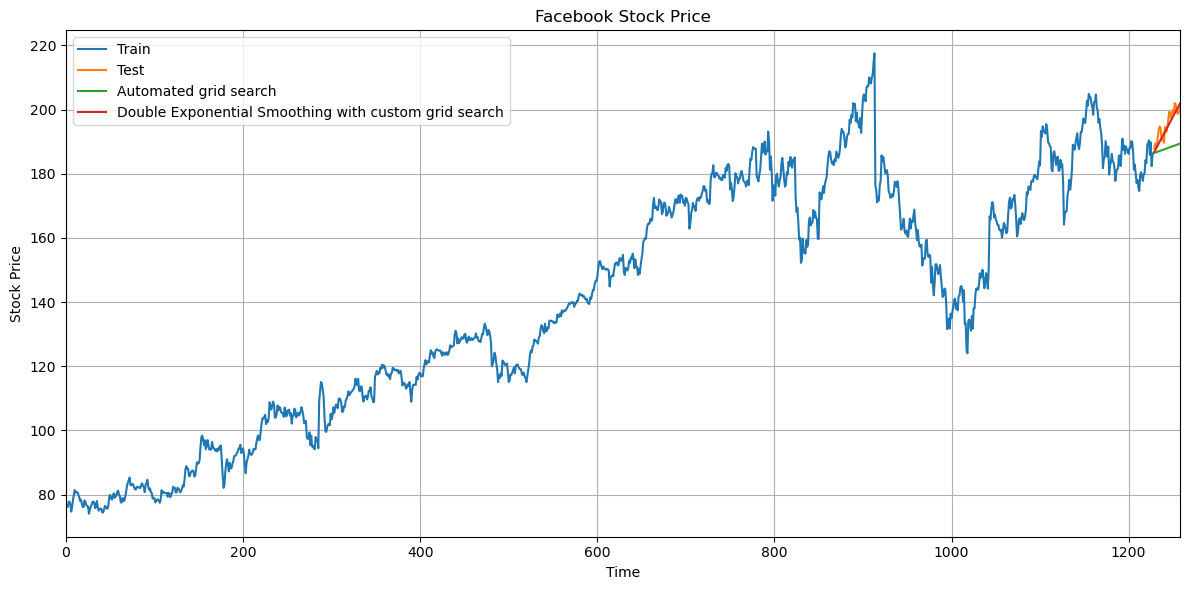

In [48]:
# Plot actual and fitted serie
plt.figure(figsize=(12, 6))                                      

plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')

plt.title('Facebook Stock Price')                      
plt.xlabel('Time')                                        
plt.ylabel('Stock Price')
plt.xlim(0,1258)
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show();